# Supervised Machine Learning: Regression Project " Car Pricing " .

###### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### Data Source --> https://www.kaggle.com/datasets/hellbuoy/car-price-predictio

###### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### Data Dictionary :

     Car_ID --> Unique id of each observation.
     Symboling --> Its assigned insurance risk rating, +3 indicates the auto is risky, -3 that it is probably pretty safe.
     carCompany --> Name of car company.
     fueltype --> Car fuel type i.e gas or diesel.
     aspiration --> Aspiration used in a car.
     doornumber --> Number of doors in a car.
     carbody --> body shape of a car.
     drivewheel --> type of drive wheel.
     enginelocation --> Location of ther car engine.
     wheelbase --> wheelbase of a car.
     carlength --> the length of the car.
     carwidth --> the width of the car.
     carheight --> the height of the car.
     curbweight --> The weight of a car without occupants or baggage.
     enginetype --> Type of the engine.
     cylindernumber --> cylinder placed in the car.
     enginesize --> Size of the car engine.
     fuelsystem --> The fuel system of the car.
     boreratio --> The boreratio of the car.
     stroke --> Stroke or volume inside the engine.
     compressionratio --> compression ratio of car.
     horsepower --> Car's horsepower.
     peakrpm --> Car's peak RPM.
     citympg --> Mileage in city.
     highwaympg --> Mileage on highway.
     price --> The price of the car. "Dependent Variable"

###### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Objective:
      Predict the price of the car based on the features we saw in the data dictionary section. 

###### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


##### Data Preprocessing Strategy :
     
     1- Read and discovering the data using .info() , .describe() functions
     
     2- Drop the uneffective columns
     
     3- Check the nullity "Non-Found"
     
     4- Check the dtype of the data and encoding the categorical columns 
        "fueltype" , "aspiration" , "carbody" --> Encoded using get_dummies() function
        "doornumber" , "cylindernumber" --> Replace the string numbers into int numbers using .replace() function
        
     5- Check the skew of the data and found that:
        - "wheelbase" , "cylindernumber" , "enginesize" , "compressionratio" , "horsepower" , "price" , "fueltype_diesel"
          , "aspiration_turbo" , "carbody_convertible" , "carbody_hardtop" , "carbody_wagon" --> Highly +ve skewed
        - "fueltype_gas" , "aspiration_std" --> Highly -ve skewed
        - apply sqrt transformation on them to normalize them
        
     6- Check for the outliers and reduce them using the Q1 , Q3 as boundries
        
     7- Check correlation with the help of a heatmap plot and found that:
        - columns 'compressionratio','citympg','highwaympg','carbody_sedan','carbody_hatchback','curbweight','wheelbase'
          have a high +ve and -ve correlations so I dropped these columns
          
     8- Spliting the data into train_set , test_set and try Linear Regression , Ridge , Lasso.
     
     9- Spliting the data into train_set , val_set , test_set and try Linear Regression , Ridge , Lasso as a pipeline.
        
        





    

###### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###  Needed Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt      
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


### Reading Data

In [2]:
data = pd.read_csv(r"C:\Users\LENOVO\Desktop\IBM Machine Learning\Regression Project\CarPrice_Assignment.csv")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
data. rename(columns = {'car_ID':'id'}, inplace = True)

In [4]:
data.set_index('id',inplace=True)


In [5]:
data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
id,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


### Drop Uneffective Columns

In [6]:
data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [7]:
data.drop(['CarName','drivewheel','enginelocation','fuelsystem','enginetype'], inplace=True, axis=1)


In [8]:
data

,symboling,fueltype,aspiration,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
id,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,gas,std,two,convertible,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,gas,std,two,hatchback,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,gas,std,four,sedan,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,gas,std,four,sedan,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,gas,std,four,sedan,109.1,188.8,68.9,55.5,2952,four,141,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,gas,turbo,four,sedan,109.1,188.8,68.8,55.5,3049,four,141,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,gas,std,four,sedan,109.1,188.8,68.9,55.5,3012,six,173,3.58,2.87,8.8,134,5500,18,23,21485.0


In [9]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Check Nullity

In [10]:
data.isnull().any()

symboling           False
fueltype            False
aspiration          False
doornumber          False
carbody             False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
cylindernumber      False
enginesize          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

### Encoding the categorical columns

In [11]:
data.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
cylindernumber       object
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [12]:
data['fueltype'].unique() 

array(['gas', 'diesel'], dtype=object)

In [13]:
data['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [14]:
data['doornumber'].unique() 

array(['two', 'four'], dtype=object)

In [15]:
data['carbody'].unique() 

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [16]:
data['cylindernumber'].unique() 

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [17]:
data = pd.get_dummies(data, columns=["fueltype","aspiration","carbody"],drop_first=True)
data.head(10)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
id,,,,,,,,,,,,,,,,,,,,,
1,3,two,88.6,168.8,64.1,48.8,2548,four,130,3.47,...,5000,21,27,13495.000,1,0,0,0,0,0
2,3,two,88.6,168.8,64.1,48.8,2548,four,130,3.47,...,5000,21,27,16500.000,1,0,0,0,0,0
3,1,two,94.5,171.2,65.5,52.4,2823,six,152,2.68,...,5000,19,26,16500.000,1,0,0,1,0,0
4,2,four,99.8,176.6,66.2,54.3,2337,four,109,3.19,...,5500,24,30,13950.000,1,0,0,0,1,0
5,2,four,99.4,176.6,66.4,54.3,2824,five,136,3.19,...,5500,18,22,17450.000,1,0,0,0,1,0
6,2,two,99.8,177.3,66.3,53.1,2507,five,136,3.19,...,5500,19,25,15250.000,1,0,0,0,1,0
7,1,four,105.8,192.7,71.4,55.7,2844,five,136,3.19,...,5500,19,25,17710.000,1,0,0,0,1,0
8,1,four,105.8,192.7,71.4,55.7,2954,five,136,3.19,...,5500,19,25,18920.000,1,0,0,0,0,1
9,1,four,105.8,192.7,71.4,55.9,3086,five,131,3.13,...,5500,17,20,23875.000,1,1,0,0,1,0


In [18]:
data['doornumber'].replace(['two','four'],[2,4],inplace=True)
data.head(10)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
id,,,,,,,,,,,,,,,,,,,,,
1,3,2,88.6,168.8,64.1,48.8,2548,four,130,3.47,...,5000,21,27,13495.000,1,0,0,0,0,0
2,3,2,88.6,168.8,64.1,48.8,2548,four,130,3.47,...,5000,21,27,16500.000,1,0,0,0,0,0
3,1,2,94.5,171.2,65.5,52.4,2823,six,152,2.68,...,5000,19,26,16500.000,1,0,0,1,0,0
4,2,4,99.8,176.6,66.2,54.3,2337,four,109,3.19,...,5500,24,30,13950.000,1,0,0,0,1,0
5,2,4,99.4,176.6,66.4,54.3,2824,five,136,3.19,...,5500,18,22,17450.000,1,0,0,0,1,0
6,2,2,99.8,177.3,66.3,53.1,2507,five,136,3.19,...,5500,19,25,15250.000,1,0,0,0,1,0
7,1,4,105.8,192.7,71.4,55.7,2844,five,136,3.19,...,5500,19,25,17710.000,1,0,0,0,1,0
8,1,4,105.8,192.7,71.4,55.7,2954,five,136,3.19,...,5500,19,25,18920.000,1,0,0,0,0,1
9,1,4,105.8,192.7,71.4,55.9,3086,five,131,3.13,...,5500,17,20,23875.000,1,1,0,0,1,0


In [19]:
data['doornumber'].unique()

array([2, 4], dtype=int64)

In [20]:
data['cylindernumber'].replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],[4,6,5,3,12,2,8],inplace=True)
data.head(10)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
id,,,,,,,,,,,,,,,,,,,,,
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,5000,21,27,13495.000,1,0,0,0,0,0
2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,5000,21,27,16500.000,1,0,0,0,0,0
3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,5000,19,26,16500.000,1,0,0,1,0,0
4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,5500,24,30,13950.000,1,0,0,0,1,0
5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,5500,18,22,17450.000,1,0,0,0,1,0
6,2,2,99.8,177.3,66.3,53.1,2507,5,136,3.19,...,5500,19,25,15250.000,1,0,0,0,1,0
7,1,4,105.8,192.7,71.4,55.7,2844,5,136,3.19,...,5500,19,25,17710.000,1,0,0,0,1,0
8,1,4,105.8,192.7,71.4,55.7,2954,5,136,3.19,...,5500,19,25,18920.000,1,0,0,0,0,1
9,1,4,105.8,192.7,71.4,55.9,3086,5,131,3.13,...,5500,17,20,23875.000,1,1,0,0,1,0


In [21]:
data['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [22]:
data.dtypes

symboling              int64
doornumber             int64
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight             int64
cylindernumber         int64
enginesize             int64
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm                int64
citympg                int64
highwaympg             int64
price                float64
fueltype_gas           uint8
aspiration_turbo       uint8
carbody_hardtop        uint8
carbody_hatchback      uint8
carbody_sedan          uint8
carbody_wagon          uint8
dtype: object

In [23]:
data.head(10)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
id,,,,,,,,,,,,,,,,,,,,,
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,5000,21,27,13495.000,1,0,0,0,0,0
2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,5000,21,27,16500.000,1,0,0,0,0,0
3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,5000,19,26,16500.000,1,0,0,1,0,0
4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,5500,24,30,13950.000,1,0,0,0,1,0
5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,5500,18,22,17450.000,1,0,0,0,1,0
6,2,2,99.8,177.3,66.3,53.1,2507,5,136,3.19,...,5500,19,25,15250.000,1,0,0,0,1,0
7,1,4,105.8,192.7,71.4,55.7,2844,5,136,3.19,...,5500,19,25,17710.000,1,0,0,0,1,0
8,1,4,105.8,192.7,71.4,55.7,2954,5,136,3.19,...,5500,19,25,18920.000,1,0,0,0,0,1
9,1,4,105.8,192.7,71.4,55.9,3086,5,131,3.13,...,5500,17,20,23875.000,1,1,0,0,1,0


### Separate the features and the label

In [24]:
x = data.drop(['price'],axis=1)
y = data['price']

### Transform skewed data

In [25]:
x.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
id,,,,,,,,,,,,,,,,,,,,,
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,111,5000,21,27,1,0,0,0,0,0
2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,111,5000,21,27,1,0,0,0,0,0
3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,154,5000,19,26,1,0,0,1,0,0
4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,102,5500,24,30,1,0,0,0,1,0
5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,115,5500,18,22,1,0,0,0,1,0


In [26]:
skewed_data = x.skew()
skewed_data

symboling            0.211072
doornumber          -0.247552
wheelbase            1.050214
carlength            0.155954
carwidth             0.904003
carheight            0.063123
curbweight           0.681398
cylindernumber       2.817459
enginesize           1.947655
boreratio            0.020156
stroke              -0.689705
compressionratio     2.610862
horsepower           1.405310
peakrpm              0.075159
citympg              0.663704
highwaympg           0.539997
fueltype_gas        -2.732619
aspiration_turbo     1.673832
carbody_hardtop      4.796006
carbody_hatchback    0.673587
carbody_sedan        0.128024
carbody_wagon        2.327670
dtype: float64

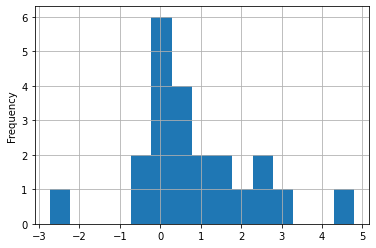

In [27]:
skewed_data.plot.hist(bins=15, grid=True, legend=None)
plt.show()

In [28]:
highly_positive_skewed_data = skewed_data[(skewed_data > 1)]

In [29]:
highly_positive_skewed_data

wheelbase           1.050214
cylindernumber      2.817459
enginesize          1.947655
compressionratio    2.610862
horsepower          1.405310
aspiration_turbo    1.673832
carbody_hardtop     4.796006
carbody_wagon       2.327670
dtype: float64

In [30]:
highly_negative_skewed_data = skewed_data[(skewed_data < -1)]

In [31]:
highly_negative_skewed_data

fueltype_gas   -2.732619
dtype: float64

In [32]:
x.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
id,,,,,,,,,,,,,,,,,,,,,
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,111,5000,21,27,1,0,0,0,0,0
2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,111,5000,21,27,1,0,0,0,0,0
3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,154,5000,19,26,1,0,0,1,0,0
4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,102,5500,24,30,1,0,0,0,1,0
5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,115,5500,18,22,1,0,0,0,1,0


### Square Root Transformation

In [33]:
for col in list(highly_positive_skewed_data.index):
    x[col] = np.sqrt(x[col])

In [34]:
for col in list(highly_negative_skewed_data.index):
    x[col] = np.sqrt(x[col])

In [35]:
skewed_data_2 = x.skew()

In [36]:
highly_positive_skewed_data_2 = skewed_data_2[(skewed_data_2 > 1)]

In [37]:
highly_positive_skewed_data_2

cylindernumber      1.815038
enginesize          1.364372
compressionratio    2.505819
aspiration_turbo    1.673828
carbody_hardtop     4.796875
carbody_wagon       2.328125
dtype: float64

In [38]:
highly_negative_skewed_data_2 = skewed_data_2[(skewed_data_2 < -1)]

In [39]:
highly_negative_skewed_data_2

fueltype_gas   -2.732422
dtype: float64

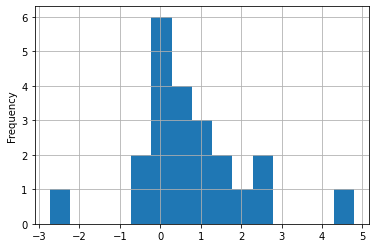

In [40]:
skewed_data_2.plot.hist(bins=15, grid=True, legend=None)
plt.show()

In [41]:
x.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
id,,,,,,,,,,,,,,,,,,,,,
1,3,2,9.412757,168.8,64.1,48.8,2548,2.000000,11.401754,3.47,...,10.535654,5000,21,27,1.0,0.0,0.0,0,0,0.0
2,3,2,9.412757,168.8,64.1,48.8,2548,2.000000,11.401754,3.47,...,10.535654,5000,21,27,1.0,0.0,0.0,0,0,0.0
3,1,2,9.721111,171.2,65.5,52.4,2823,2.449490,12.328828,2.68,...,12.409674,5000,19,26,1.0,0.0,0.0,1,0,0.0
4,2,4,9.989995,176.6,66.2,54.3,2337,2.000000,10.440307,3.19,...,10.099505,5500,24,30,1.0,0.0,0.0,0,1,0.0
5,2,4,9.969955,176.6,66.4,54.3,2824,2.236068,11.661904,3.19,...,10.723805,5500,18,22,1.0,0.0,0.0,0,1,0.0


### Detect the outliers

In [42]:
data.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'fueltype_gas', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon'],
      dtype='object')

<AxesSubplot:xlabel='boreratio'>

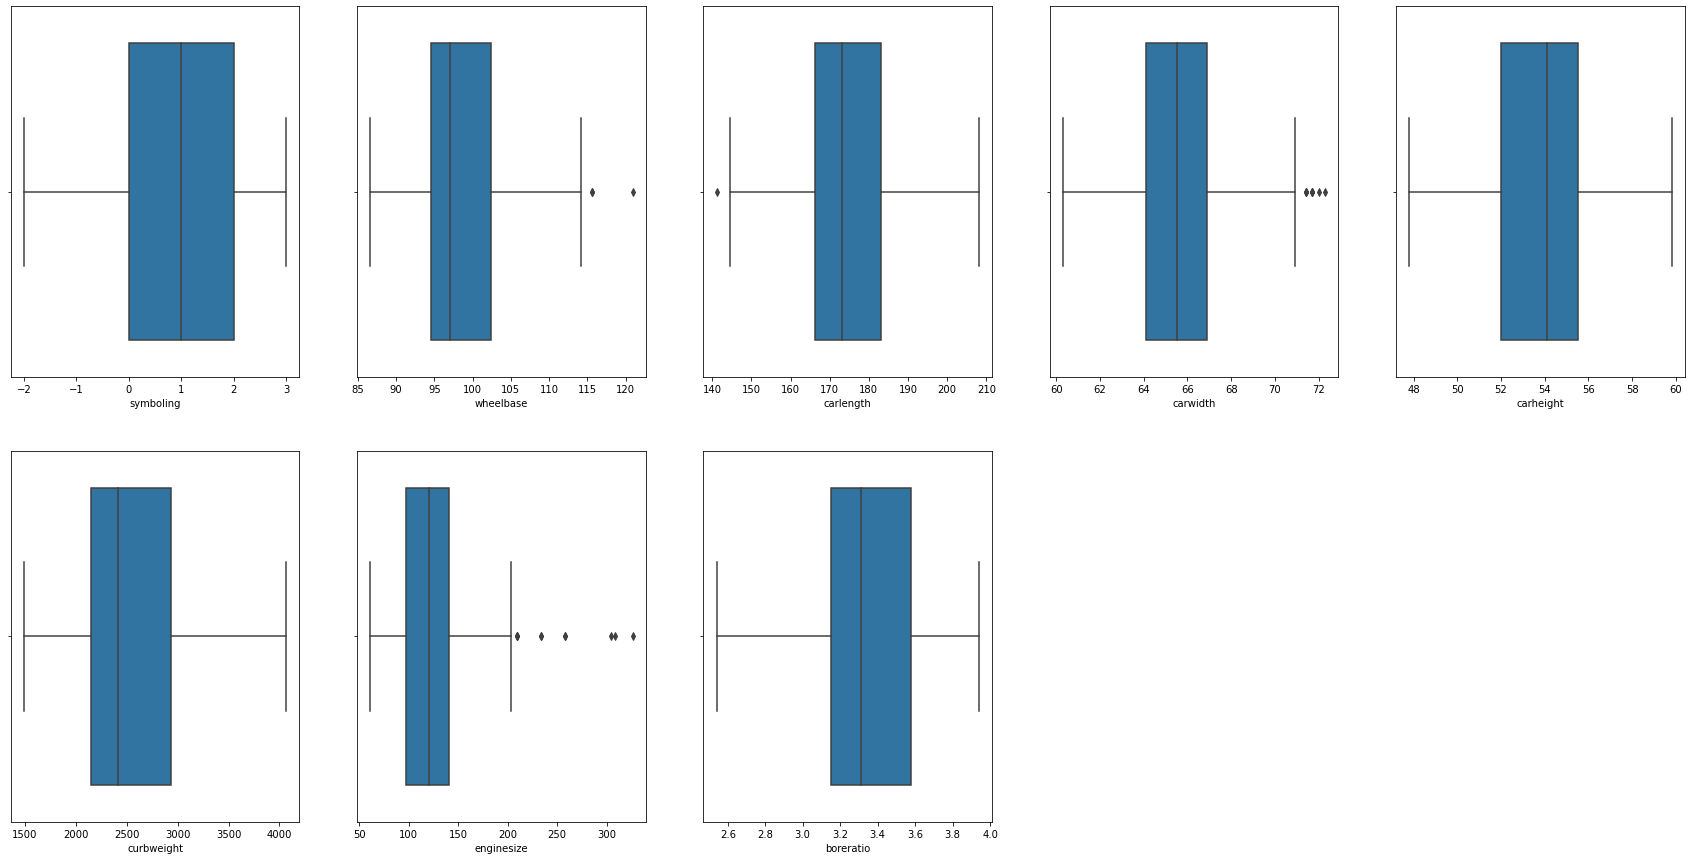

In [43]:
plt.figure(figsize=(30,15))
plt.subplot(2,5,1)
sns.boxplot(data['symboling'])
plt.subplot(2,5,2)
sns.boxplot(data['wheelbase'])
plt.subplot(2,5,3)
sns.boxplot(data['carlength'])
plt.subplot(2,5,4)
sns.boxplot(data['carwidth'])
plt.subplot(2,5,5)
sns.boxplot(data['carheight']);
plt.subplot(2,5,6)
sns.boxplot(data['curbweight']);
plt.subplot(2,5,7)
sns.boxplot(data['enginesize'])
plt.subplot(2,5,8)
sns.boxplot(data['boreratio'])



<AxesSubplot:xlabel='price'>

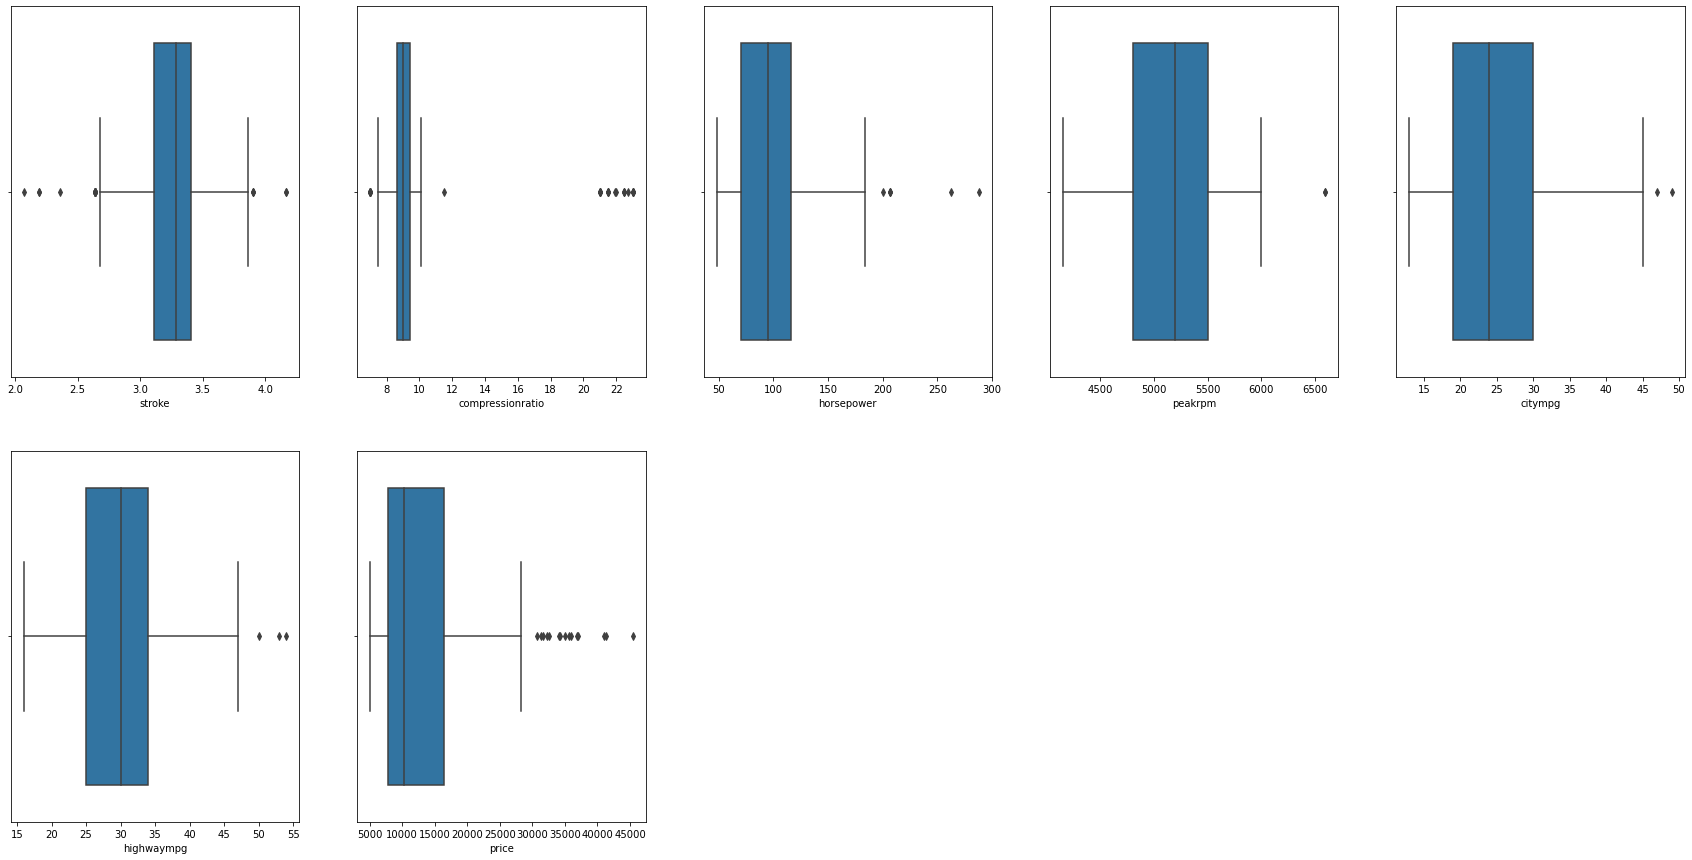

In [44]:
plt.figure(figsize=(30,15))
plt.subplot(2,5,1)
sns.boxplot(data['stroke'])
plt.subplot(2,5,2)
sns.boxplot(data['compressionratio']);
plt.subplot(2,5,3)
sns.boxplot(data['horsepower']);
plt.subplot(2,5,4)
sns.boxplot(data['peakrpm'])
plt.subplot(2,5,5)
sns.boxplot(data['citympg'])
plt.subplot(2,5,6)
sns.boxplot(data['highwaympg'])
plt.subplot(2,5,7)
sns.boxplot(data['price'])

In [45]:
for col in ['wheelbase', 'carlength', 'carwidth','enginesize','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data.loc[data[col] > Q3 + 1.5 * IQR, col] = data.describe().loc['50%'][col]


<AxesSubplot:xlabel='boreratio'>

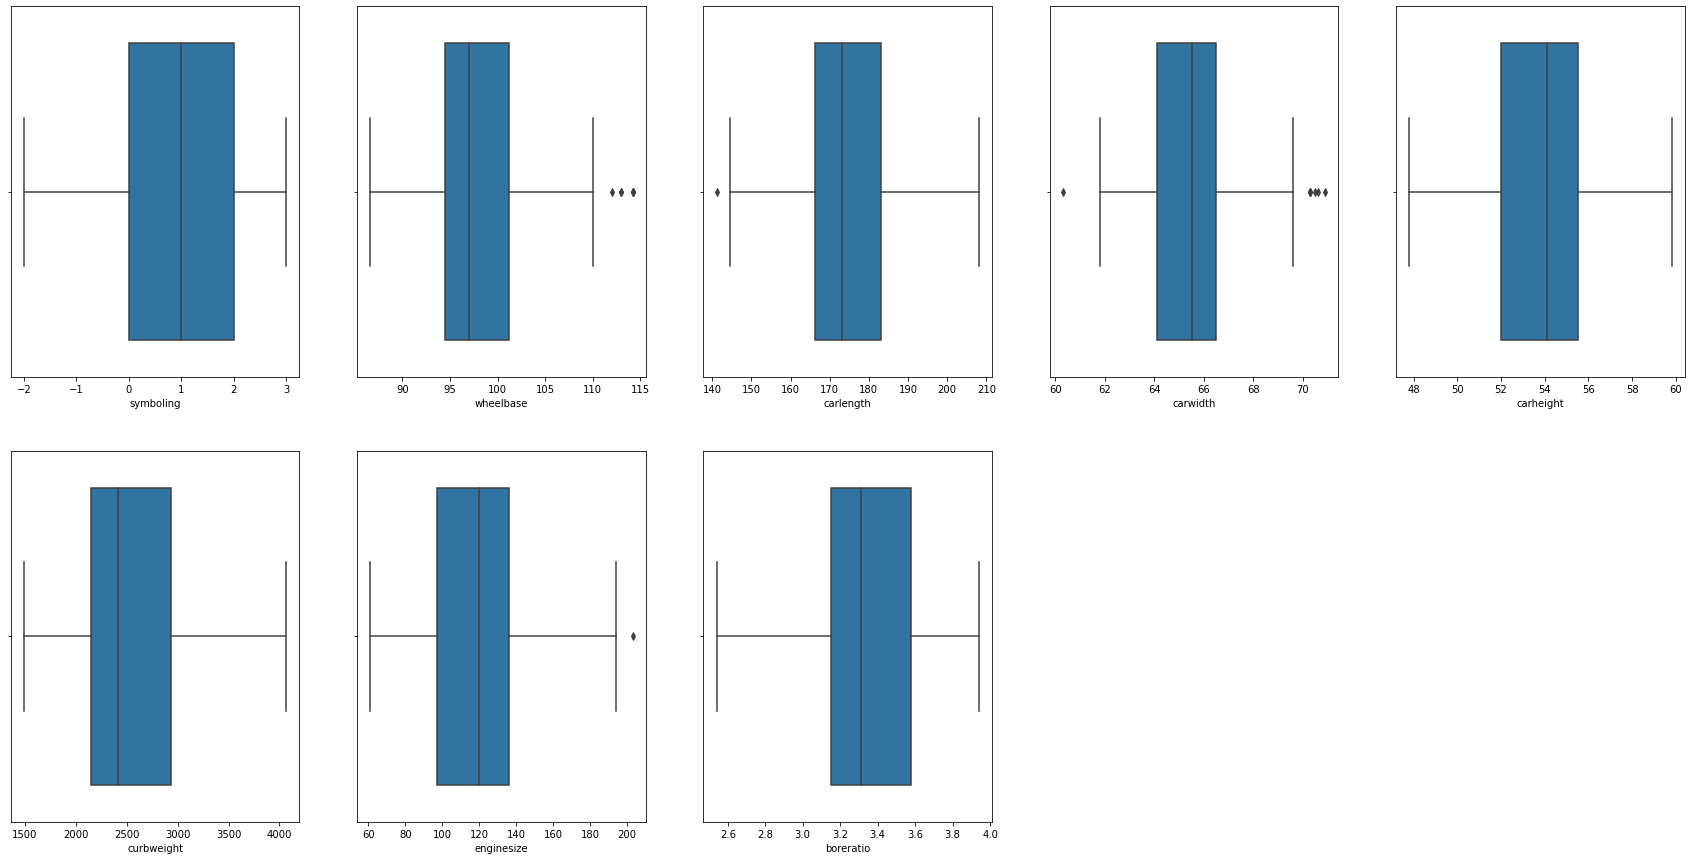

In [46]:
plt.figure(figsize=(30,15))
plt.subplot(2,5,1)
sns.boxplot(data['symboling'])
plt.subplot(2,5,2)
sns.boxplot(data['wheelbase'])
plt.subplot(2,5,3)
sns.boxplot(data['carlength'])
plt.subplot(2,5,4)
sns.boxplot(data['carwidth'])
plt.subplot(2,5,5)
sns.boxplot(data['carheight']);
plt.subplot(2,5,6)
sns.boxplot(data['curbweight']);
plt.subplot(2,5,7)
sns.boxplot(data['enginesize'])
plt.subplot(2,5,8)
sns.boxplot(data['boreratio'])

<AxesSubplot:xlabel='price'>

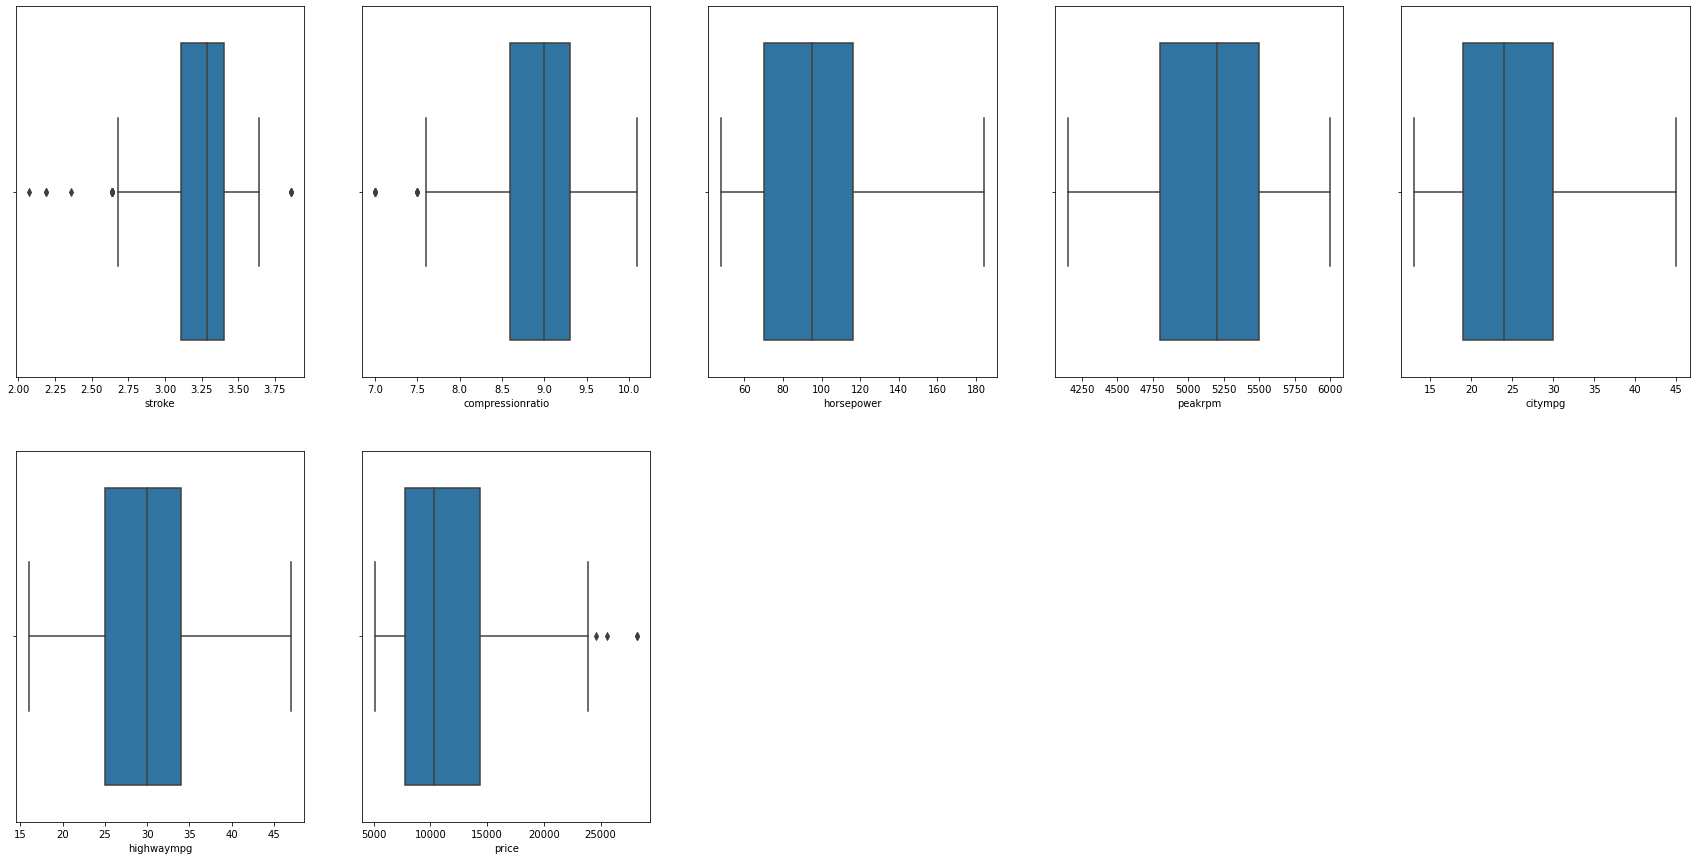

In [47]:
plt.figure(figsize=(30,15))
plt.subplot(2,5,1)
sns.boxplot(data['stroke'])
plt.subplot(2,5,2)
sns.boxplot(data['compressionratio']);
plt.subplot(2,5,3)
sns.boxplot(data['horsepower']);
plt.subplot(2,5,4)
sns.boxplot(data['peakrpm'])
plt.subplot(2,5,5)
sns.boxplot(data['citympg'])
plt.subplot(2,5,6)
sns.boxplot(data['highwaympg'])
plt.subplot(2,5,7)
sns.boxplot(data['price'])

In [48]:
x.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
id,,,,,,,,,,,,,,,,,,,,,
1,3,2,9.412757,168.8,64.1,48.8,2548,2.000000,11.401754,3.47,...,10.535654,5000,21,27,1.0,0.0,0.0,0,0,0.0
2,3,2,9.412757,168.8,64.1,48.8,2548,2.000000,11.401754,3.47,...,10.535654,5000,21,27,1.0,0.0,0.0,0,0,0.0
3,1,2,9.721111,171.2,65.5,52.4,2823,2.449490,12.328828,2.68,...,12.409674,5000,19,26,1.0,0.0,0.0,1,0,0.0
4,2,4,9.989995,176.6,66.2,54.3,2337,2.000000,10.440307,3.19,...,10.099505,5500,24,30,1.0,0.0,0.0,0,1,0.0
5,2,4,9.969955,176.6,66.4,54.3,2824,2.236068,11.661904,3.19,...,10.723805,5500,18,22,1.0,0.0,0.0,0,1,0.0


### Check the correlation

In [49]:
data.head(10)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
id,,,,,,,,,,,,,,,,,,,,,
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,5000,21,27,13495.000,1,0,0,0,0,0
2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,5000,21,27,16500.000,1,0,0,0,0,0
3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,5000,19,26,16500.000,1,0,0,1,0,0
4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,5500,24,30,13950.000,1,0,0,0,1,0
5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,5500,18,22,17450.000,1,0,0,0,1,0
6,2,2,99.8,177.3,66.3,53.1,2507,5,136,3.19,...,5500,19,25,15250.000,1,0,0,0,1,0
7,1,4,105.8,192.7,65.5,55.7,2844,5,136,3.19,...,5500,19,25,17710.000,1,0,0,0,1,0
8,1,4,105.8,192.7,65.5,55.7,2954,5,136,3.19,...,5500,19,25,18920.000,1,0,0,0,0,1
9,1,4,105.8,192.7,65.5,55.9,3086,5,131,3.13,...,5500,17,20,23875.000,1,1,0,0,1,0


In [50]:
data.corr()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
symboling,1.000000,-0.664073,-0.512726,-0.357612,-0.228124,-0.541038,-0.227691,-0.113129,-0.056343,-0.130051,...,0.283473,-0.074083,0.001504,-0.121806,0.194311,-0.059866,0.168845,0.435648,-0.378341,-0.298243
doornumber,-0.664073,1.000000,0.436132,0.398568,0.200800,0.552208,0.197379,-0.016009,0.030723,0.119258,...,-0.226149,0.029998,0.018898,0.142168,-0.191491,0.031792,-0.227793,-0.606688,0.515046,0.329690
wheelbase,-0.512726,0.436132,1.000000,0.811604,0.759385,0.575718,0.709540,0.232379,0.411294,0.468816,...,-0.317521,-0.394776,-0.458186,0.600212,-0.295922,0.261186,0.001504,-0.378735,0.257504,0.247964
carlength,-0.357612,0.398568,0.811604,1.000000,0.767383,0.491029,0.877728,0.430672,0.571747,0.606454,...,-0.288718,-0.618479,-0.660704,0.622560,-0.212679,0.234539,0.047292,-0.436269,0.269647,0.219683
carwidth,-0.228124,0.200800,0.759385,0.767383,1.000000,0.247624,0.807316,0.378408,0.588676,0.570168,...,-0.222755,-0.566680,-0.594373,0.677243,-0.266668,0.336474,0.015077,-0.207177,0.145458,0.073612
carheight,-0.541038,0.552208,0.575718,0.491029,0.247624,1.000000,0.295572,-0.013995,0.114354,0.171071,...,-0.322762,-0.024002,-0.095205,0.245636,-0.284631,0.087311,-0.072328,-0.477476,0.235863,0.459148
curbweight,-0.227691,0.197379,0.709540,0.877728,0.807316,0.295572,1.000000,0.609727,0.700681,0.648480,...,-0.263906,-0.737446,-0.781422,0.668116,-0.217275,0.324902,0.098956,-0.287501,0.099425,0.164075
cylindernumber,-0.113129,-0.016009,0.232379,0.430672,0.378408,-0.013995,0.609727,1.000000,0.503397,0.231399,...,-0.119834,-0.444783,-0.470818,0.231899,0.024544,-0.047972,0.139149,-0.177782,0.113090,-0.048559
enginesize,-0.056343,0.030723,0.411294,0.571747,0.588676,0.114354,0.700681,0.503397,1.000000,0.596687,...,-0.211304,-0.565932,-0.550697,0.666140,-0.178688,0.268091,0.234540,-0.150872,-0.014990,0.046285
boreratio,-0.130051,0.119258,0.468816,0.606454,0.570168,0.171071,0.648480,0.231399,0.596687,1.000000,...,-0.257903,-0.563709,-0.560246,0.440439,-0.054451,0.212614,0.208089,-0.227032,0.030517,0.105719


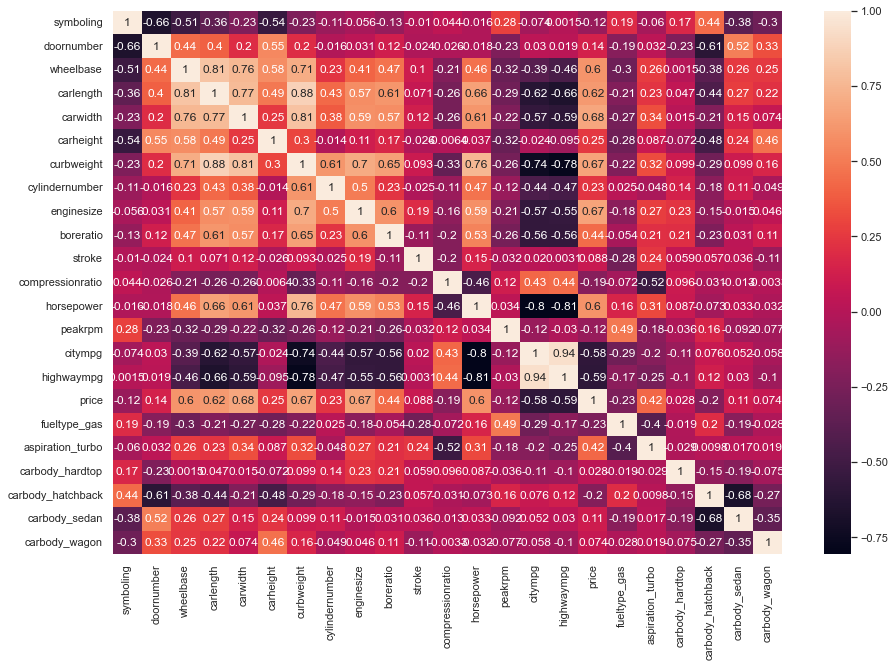

In [51]:
sns.set(rc = {'figure.figsize':(15,10)})
dataplot = sns.heatmap(data.corr(),annot=True)
plt.show()

In [52]:
data.drop(['compressionratio','citympg','highwaympg','carbody_sedan','carbody_hatchback','curbweight','wheelbase'], inplace=True, axis=1)


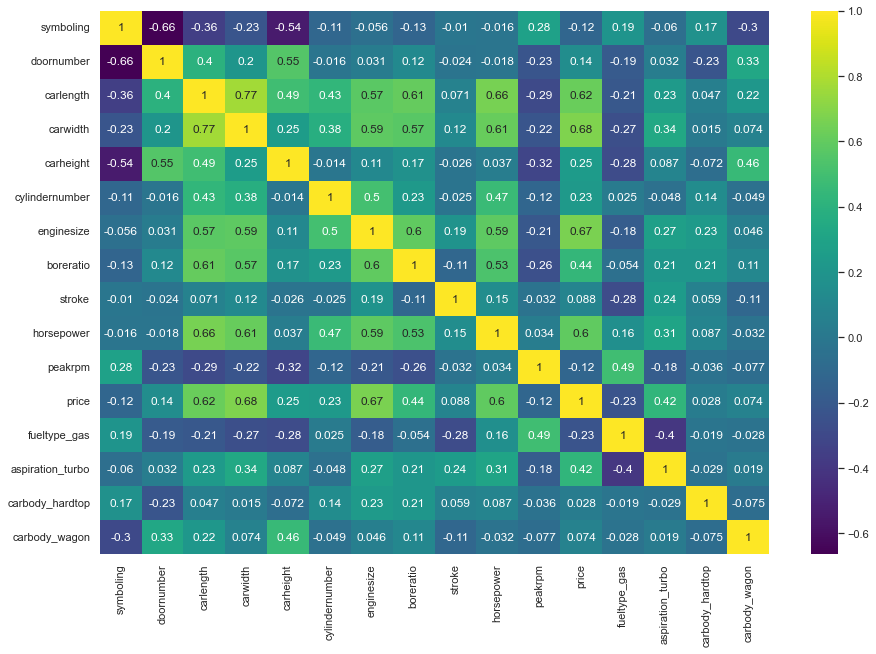

In [53]:
sns.set(rc = {'figure.figsize':(15,10)})
dataplot = sns.heatmap(data.corr(),annot=True,cmap ='viridis')
plt.show()

In [54]:
x.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
id,,,,,,,,,,,,,,,,,,,,,
1,3,2,9.412757,168.8,64.1,48.8,2548,2.000000,11.401754,3.47,...,10.535654,5000,21,27,1.0,0.0,0.0,0,0,0.0
2,3,2,9.412757,168.8,64.1,48.8,2548,2.000000,11.401754,3.47,...,10.535654,5000,21,27,1.0,0.0,0.0,0,0,0.0
3,1,2,9.721111,171.2,65.5,52.4,2823,2.449490,12.328828,2.68,...,12.409674,5000,19,26,1.0,0.0,0.0,1,0,0.0
4,2,4,9.989995,176.6,66.2,54.3,2337,2.000000,10.440307,3.19,...,10.099505,5500,24,30,1.0,0.0,0.0,0,1,0.0
5,2,4,9.969955,176.6,66.4,54.3,2824,2.236068,11.661904,3.19,...,10.723805,5500,18,22,1.0,0.0,0.0,0,1,0.0


### Split the data into 2 sets

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
lr = LinearRegression()
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.6126704398964343
0.45549811369448734


In [57]:
ridgeR = Ridge()
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)
print(ridgeR.score(x_test,y_test))

0.4521823690400121


In [58]:
lassoR = Lasso()
lassoR.fit(x_train, y_train)
y_pred = lassoR.predict(x_test)
print(lassoR.score(x_test,y_test))

0.4537232294446718


###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Split the data into 3 sets and apply pipeline

In [59]:
train_val, test = train_test_split(data, test_size=0.2, random_state=0)
print('Training set size:' +str(train_val.shape))
print('Test set size: ' +str(test.shape))

Training set size:(164, 16)
Test set size: (41, 16)


In [60]:
train, val = train_test_split(train_val, test_size=0.2, random_state=0)
print('Training set size:' +str(train.shape))
print('Test set size: ' +str(val.shape))

Training set size:(131, 16)
Test set size: (33, 16)


In [61]:
x_train = train.drop(['price'],axis=1)
y_train = train['price']

In [62]:
x_val = val.drop(['price'],axis=1)
y_val = val['price']

In [63]:
x_test = test.drop(['price'],axis=1)
y_test = test['price']

In [70]:
pipe_lr = Pipeline([('scaler', StandardScaler()), ('lr3', LinearRegression())])
pipe_lr.fit(x_train,y_train)
print(pipe_lr.score(x_val,y_val))
print(pipe_lr.score(x_train,y_train))

0.706462393301388
0.7020450340694355


In [71]:
print(pipe_lr.score(x_test,y_test))

0.5971710824598528


In [72]:
pipe_lasso = Pipeline([('scaler', StandardScaler()), ('lassoR3', Lasso())])
pipe_lasso.fit(x_train,y_train)
print(pipe_lasso.score(x_val,y_val))
print(pipe_lasso.score(x_train,y_train))

0.7063944798230694
0.7020438693887225


In [73]:
print(pipe_lasso.score(x_test,y_test))

0.5973810158218853


In [74]:
pipe_ridge = Pipeline([('scaler', StandardScaler()), ('ridgeR3', Ridge())])
pipe_ridge.fit(x_train,y_train)
print(pipe_ridge.score(x_val,y_val))
print(pipe_ridge.score(x_train,y_train))

0.7058921965764757
0.7019281320231037


In [75]:
print(pipe_ridge.score(x_test,y_test))

0.6008502742430745


###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Notes:
##### We needed more observations of data to reach a higher accuracy 